#**Продуктовая аналитика**#

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [23]:
# загрузка датасетов
orders = pd.read_excel('orders.xlsx')
products = pd.read_excel('products.xlsx')

In [24]:
# объединяем датасеты
df = orders.merge(products, left_on='product_id', right_on='product_id', how='inner').rename(columns={'level1':'category', 'level2':'subcategory'})

In [25]:
# создадим столбцы с датой и выручкой
df['date'] = df['accepted_at'].dt.date
df['revenue'] = df['quantity']*df['price']
df.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,category,subcategory,name,date,revenue
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13,169
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13,169
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13,169
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,2022-01-13,219
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,2022-01-13,219


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3018 non-null   int64         
 1   accepted_at    3018 non-null   datetime64[ns]
 2   product_id     3018 non-null   int64         
 3   quantity       3018 non-null   int64         
 4   regular_price  3018 non-null   int64         
 5   price          3018 non-null   int64         
 6   cost_price     3018 non-null   int64         
 7   category       3018 non-null   object        
 8   subcategory    3018 non-null   object        
 9   name           3010 non-null   object        
 10  date           3018 non-null   object        
 11  revenue        3018 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 283.1+ KB


Данные подготовлены к дальнейшему анализу.

##**1. Определим самую ходовую товарную группу**##

Создадим таблицу, в которой рассчитано количество проданных штук товара в каждой товарной категории.

In [6]:
most_sold_products = df.groupby('category')['quantity'].agg(cnt='sum').sort_values('cnt', ascending=False).reset_index()
most_sold_products

,category,cnt
0,Безалкогольные напитки,534
1,Молочная продукция,483
2,Свежие овощи,262
3,Кулинария,250
4,Бакалея,239
5,Хлеб и хлебобулочные изделия,218
6,Снэки,212
7,Свежие фрукты,184
8,Замороженная продукция,175
9,Кондитерские изделия,138


Построим диаграмму на основании таблицы.

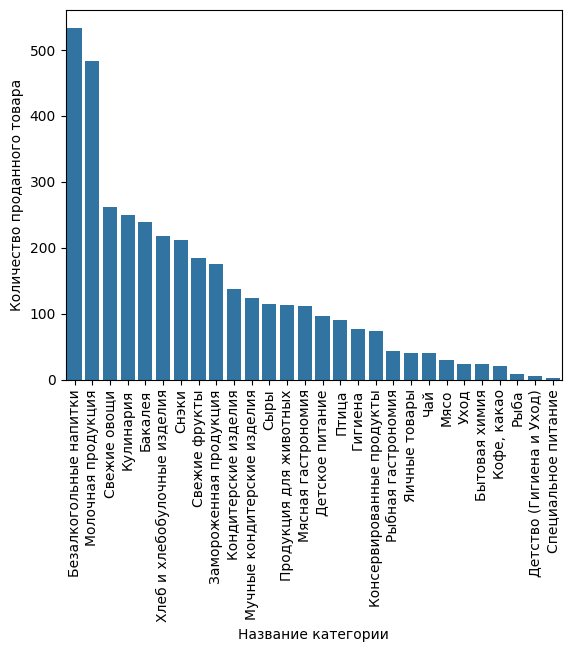

In [7]:
plot = sns.barplot(x=most_sold_products['category'], y=most_sold_products['cnt'])

plt.setp(plot.get_xticklabels(), rotation=90)

plot.set(xlabel='Название категории', ylabel='Количество проданного товара');

##**2. Оценка распределения продаж по подкатегориям**##

Оценим распределение количества проданных позиций в каждой товарной категории по подкатегориям.

In [8]:
disrtibution_by_subcategory = df.groupby(['category', 'subcategory'])['quantity'].agg(amount='sum').sort_values('amount', ascending=False).reset_index()
disrtibution_by_subcategory.head(10)

,category,subcategory,amount
0,Безалкогольные напитки,Напитки,252
1,Кулинария,Готовые блюда,248
2,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
3,Снэки,Снэки соленые,180
4,Безалкогольные напитки,Воды питьевые,162
5,Свежие овощи,"Корнеплоды, зелень и прочие овощи",157
6,Молочная продукция,Молоко и сливки,147
7,Молочная продукция,Молочно-десертные продукты,116
8,Свежие фрукты,"Цитрусовые, семечковые и прочие плоды",108
9,Молочная продукция,Кисломолочные традиционные продукты,106


##**3. Определим средний чек в заданную дату**##

In [9]:
avg_cheque = int(
    orders[orders['accepted_at'].dt.strftime('%Y-%m-%d')=='2022-01-13']
    .groupby('order_id')
    .apply(lambda x: (x['price']*x['quantity']).sum(), include_groups=False)
    .mean()
)

In [10]:
print(f'Средний чек на 13.01.2022 г. составляет {avg_cheque} руб.')

Средний чек на 13.01.2022 г. составляет 915 руб.


##**4. Найдем долю промо-товаров в заданной категории**##

Посчитаем, какую долю от общих продаж категории Сыры занимают промо (в штуках).

In [12]:
# отфильтруем товары по категории
cheese = df[df['category']=='Сыры']
cheese['is_promo'] = (cheese['price'] != cheese['regular_price'])

<ipython-input-12-8aa16bdcae43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheese['is_promo'] = (cheese['price'] != cheese['regular_price'])


In [13]:
ratio = round(cheese[cheese['is_promo'] == True]['quantity'].sum() / cheese['quantity'].sum(),2)
print(f'Доля сыров промо от общего количества составляет {ratio}')

Доля сыров промо от общего количества составляет 0.31


In [14]:
# построим круговую диаграмму
d = {True:'Промо', False:'Не промо'}
cheese_promo = cheese.groupby('is_promo')['quantity'].agg(summa='sum').reset_index()
cheese_promo['is_promo'] = cheese_promo['is_promo'].map(d)

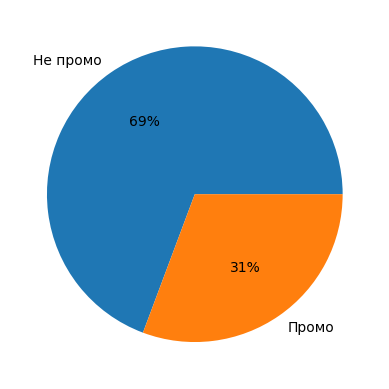

In [15]:
plt.pie(cheese_promo['summa'], labels=cheese_promo['is_promo'], autopct='%.0f%%');

##**5. Посчитать маржу по категориям**##

Рассчитаем маржу в рублях и процентах. Для этого создадим функцию.

In [16]:
def calc_margin(x):
  d = {}
  d['margin_rub'] = sum((x['price']-x['cost_price'])*x['quantity'])
  d['margin_perc'] = d['margin_rub'] / sum(x['cost_price']*x['quantity'])*100
  return pd.Series(d, index=['margin_rub', 'margin_perc'])

In [17]:
margin = df.groupby('category').apply(calc_margin, include_groups=False).reset_index()
margin.head()

,category,margin_rub,margin_perc
0,Бакалея,8177.0,60.173670
1,Безалкогольные напитки,20373.0,79.167638
2,Бытовая химия,1441.0,35.694823
3,Гигиена,2971.0,41.939582
4,Детское питание,1817.0,55.497862


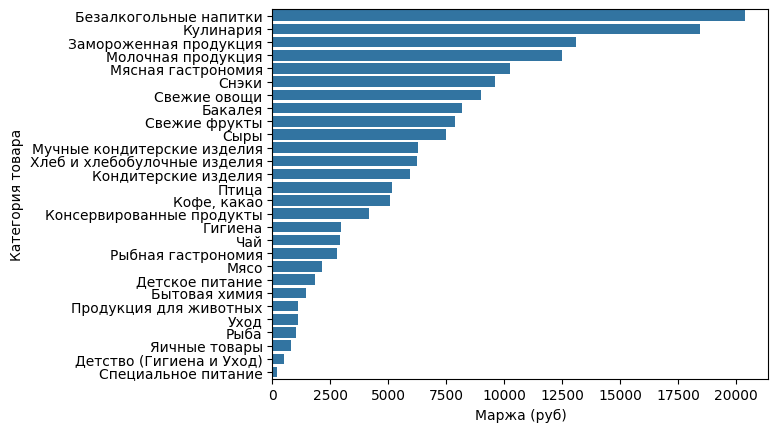

In [18]:
margin_plot = margin.sort_values('margin_rub', ascending=False)
plot = sns.barplot(data=margin_plot, x=margin_plot['margin_rub'], y=margin_plot['category'], orient='h')
plot.set(xlabel='Маржа (руб)', ylabel='Категория товара');

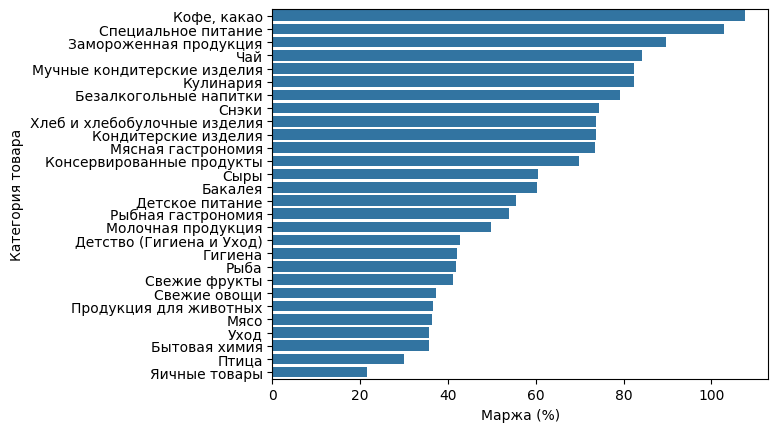

In [19]:
margin_plot = margin.sort_values('margin_perc', ascending=False)
plot = sns.barplot(data=margin_plot, x=margin_plot['margin_perc'], y=margin_plot['category'], orient='h')
plot.set(xlabel='Маржа (%)', ylabel='Категория товара');

##**ABC-анализ**##

Выполним ABC-анализ продаж по количеству и по сумме продаж.
Создадим новый столбец, в котором будет итоговая группа на основании двух анализов.  

 ABC-анализ проведем по подкатегориям, а не по отдельным товарам. Имеющихся у нас данных за небольшой период недостаточно для качественного анализа на уровне товаров. К тому же, количество товаров слишком велико, что может также исказить результаты. А ABC-анализ по подкатегориям даст более адекватную и интерпретируемую картину.

In [26]:
groupped = df.groupby('subcategory', as_index=False).apply(lambda x: pd.Series({
    'cnt': x['quantity'].sum(),
    'revenue': (x['quantity']*x['price']).sum()}),
    include_groups=False)
groupped

,subcategory,cnt,revenue
0,"Бананы, косточковые и прочие плоды",76,10191
1,Бараночные и сухарные изделия,8,460
2,Бритье,3,731
3,Бумажная продукция,42,4569
4,Влажные салфетки,2,255
...,...,...,...
95,Чайные напитки,7,1349
96,Черный чай,26,3890
97,Шоколад,29,4265
98,Шоколадные конфеты в коробках,3,447


In [30]:
groupped = groupped.sort_values('cnt', ascending=False)
groupped['cnt_frac'] = groupped['cnt']/groupped['cnt'].sum()
groupped['cum_cnt'] = groupped['cnt_frac'].cumsum()

# создадим функцию для присвоения группы
def set_abc(x):
  if x < 0.8:
    return 'A'
  elif x < 0.95:
    return 'B'
  else:
    return 'C'

groupped['abc_cnt'] = groupped['cum_cnt'].apply(set_abc)

groupped=groupped.sort_values('revenue',ascending=False)
groupped['revenue_frac'] = groupped['revenue']/groupped['revenue'].sum()
groupped['cum_revenue'] = groupped['revenue_frac'].cumsum()

groupped['abc_revenue'] = groupped['cum_revenue'].apply(set_abc)
groupped['ABC'] = groupped['abc_cnt'] + groupped['abc_revenue']

In [31]:
ABC = groupped[['subcategory','ABC']]
ABC

,subcategory,ABC
10,Готовые блюда,AA
51,Напитки,AA
50,Мясо птицы охлажденное,AA
85,"Тепличные овощи, грибы",AA
72,Снэки соленые,AA
...,...,...
77,Средства для сантехники,CC
24,"Какао, горячий шоколад",CC
91,Уход за одеждой и обувью,CC
57,Первая помощь,CC


In [34]:
ABC.groupby('ABC', as_index=False)['subcategory'].agg(cnt='count').sort_values('ABC')

,ABC,cnt
0,AA,23
1,AB,5
2,AC,2
3,BA,9
4,BB,15
5,BC,4
6,CB,10
7,CC,32


На основании полученных результатов необходимо составить план мероприятий для групп, которые позволят улучшить продажи данных подкатегорий товаров.